# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 4
*gelöst von Stollmayer Max*

### Aufgabe 1

Zusatzaufgabe

### Aufgabe 2

Zu implementieren ist das Mehrschrittverfahren nach Adams-Bashforth. Dabei sind die drei zusätzlichen Startwerte mittels Vorwärts-Euler, Runge-Kutta-4 und der exakten Lösung zu bestimmen und deren Performance zu vergleichen.

#### Definitions

In [2]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha= 0.8, facecolor="white", edgecolor="white")

In [3]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

In [4]:
def RungeKutta4(f, y0, t):
    '''
    Returns list of function values approximated with the Runge-Kutta method of 4th order.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''
    
    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h/2, y[n] + h/2 * k1)
        k3 = f(t[n] + h/2, y[n] + h/2 * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        
        y[n+1] = y[n] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    
    return y

In [5]:
def AdamsBashforth(f, y0, t, steps=4, inits=None):
    '''
    Returns list of function values approximated with the Adams-Bashforth method.

    f ....... function of ODE y'(t) = f(t, y)
    y0 ...... initial value y(t0) = y0
    t ....... discretized interval [t0, t1, ...]
    steps ... number of points to interpolate each time step
    inits ... optional values [y1, y2, ..., ysteps]
    '''
    
    coeffs = (1,
              [-1/2, 3/2],
              [5/12, -16/12, 23/12],
              [-9/24, 37/24, -59/24, 55/24],
              [251/720, -1274/720, 2616/720, -2774/720, 1901/720])
    
    s = steps if 0 < steps < 5 else 4
    
    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0
    
    fvals = np.zeros(dim)
    fvals[0] = f(t[0], y[0])
    
    if inits is None:
        for n in range(s):
            h = t[n+1] - t[n]
            y[n+1] = y[n] + h * np.dot(coeffs[n], fvals[:n+1])
            fvals[n+1] = f(t[n+1], y[n+1])
    else:
        M = len(inits)
        for n in range(s):
            if n > M:
                h = t[n+1] - t[n]
                y[n+1] = y[n] + h * np.dot(coeffs[n], fvals[:n+1])
                fvals[n+1] = f(t[n+1], y[n+1])
            else:
                y[n+1] = inits[n]
                fvals[n+1] = f(t[n+1], y[n+1])
        
    for n in range(s, N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * np.dot(coeffs[s-1], fvals[n-s+1:n+1])
        fvals[n+1] = f(t[n+1], y[n+1])
        
    return y

#### Test
$y'(t) = -2\ t\ y(t)^2, \quad y(0) = 1$

In [30]:
def f(t, y):
    return -2 * t * y**2

def exact(t):
    return 1 / (t**2 + 1)

def error(vals):
    '''Error at t = 1'''
    return np.abs(exact(1) - vals[-1])

def order(errors):
    '''Approximation of order of convergence'''
    return np.log(errors[-1] / errors[0]) / np.log(steps[0] / steps[-1])

steps = 10 * 2**np.arange(6)
y0 = 1

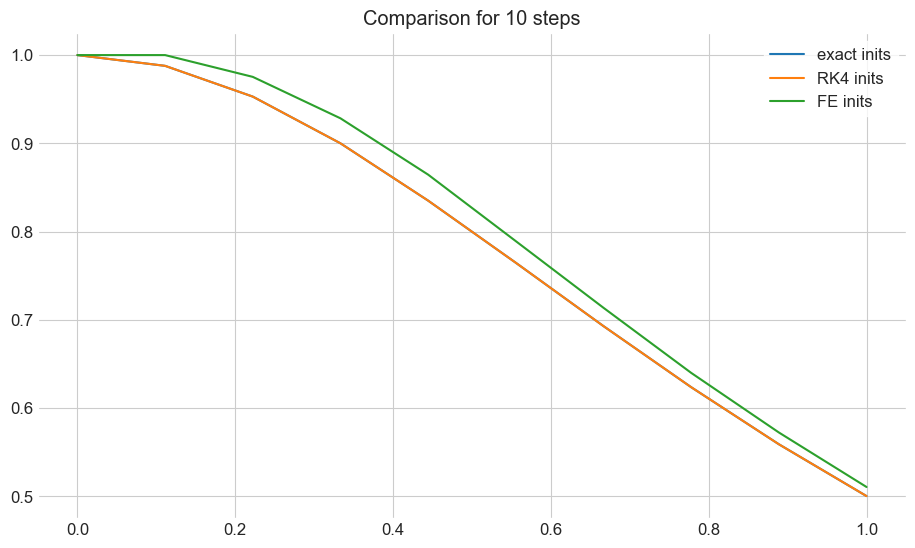

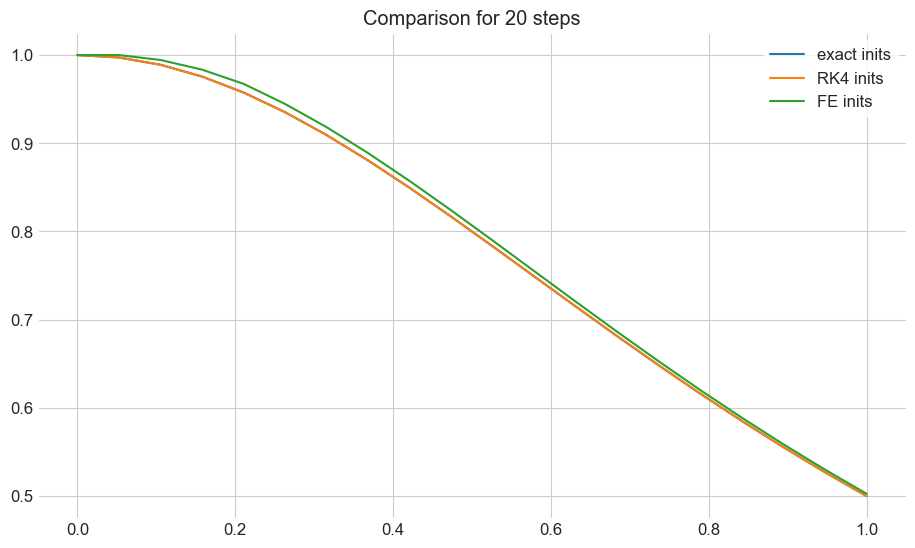

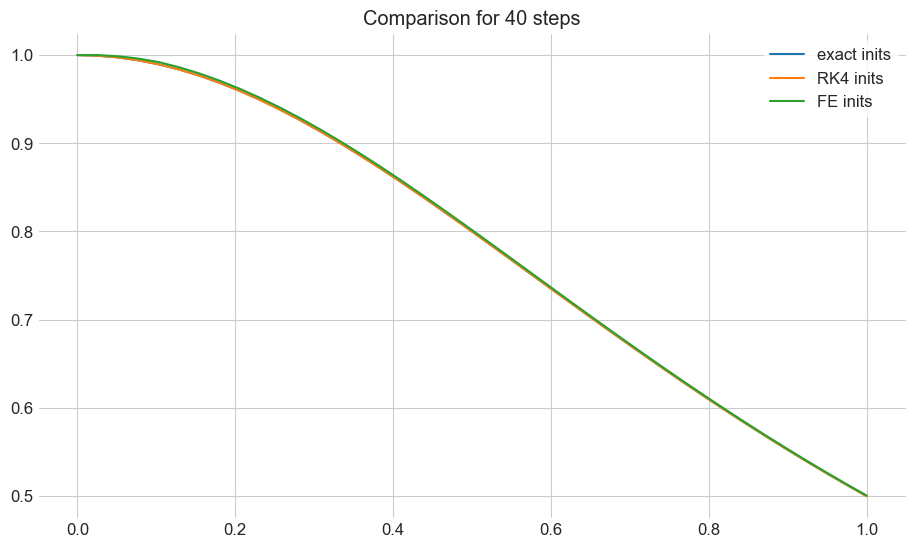

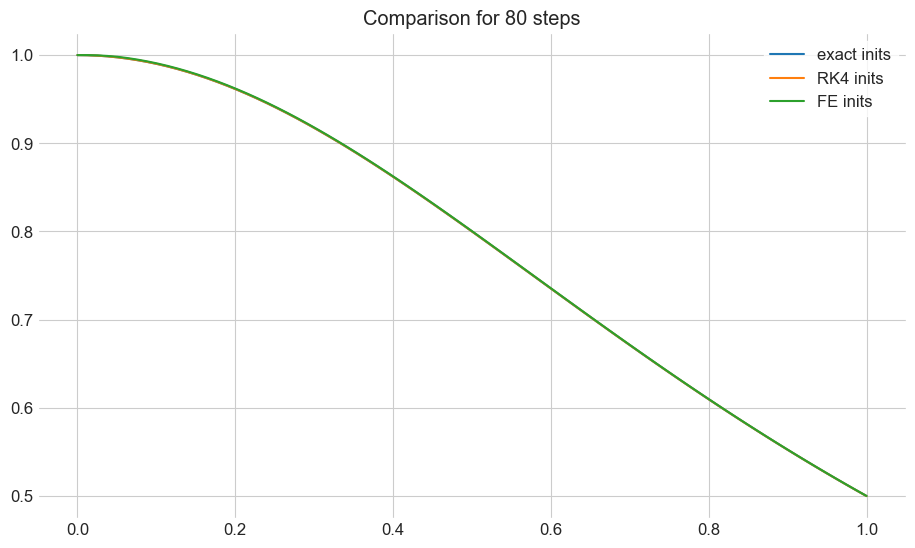

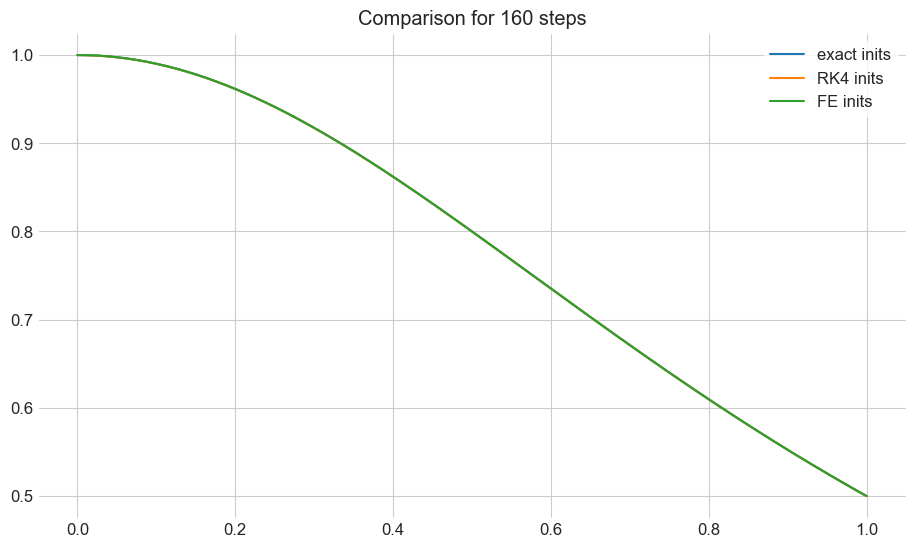

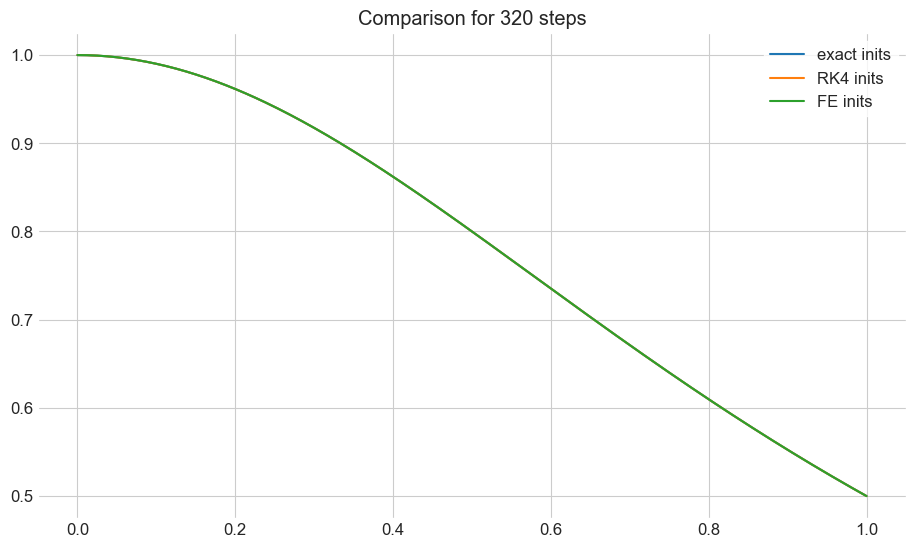

In [21]:
errors1 = errors2 = errors3 = ()

for N in steps:
    t = np.linspace(0, 1, N)
    
    inits1 = forwardEuler(f, y0, t[0:5])[1:]
    inits2 = RungeKutta4(f, y0, t[0:5])[1:]
    inits3 = exact(t[1:5])

    y1 = AdamsBashforth(f, y0, t, inits=inits1)
    y2 = AdamsBashforth(f, y0, t, inits=inits2)
    y3 = AdamsBashforth(f, y0, t, inits=inits3)
    
    errors1 += (error(y1),)
    errors2 += (error(y2),)
    errors3 += (error(y3),)
    
    plt.plot(t, y3, label="exact inits")
    plt.plot(t, y2, label="RK4 inits")
    plt.plot(t, y1, label="FE inits")
    plt.legend()
    plt.title(f"Comparison for {N} steps")
    plt.show()

In [35]:
print(" initial values:    exact   |    RK4    | f. Euler")
for i in range(len(steps)):
    print(f"{steps[i]:3} steps error:  {errors1[i]:.3E} | {errors2[i]:.3E} | {errors3[i]:.3E}")
print(f"\t  order:  {order(errors1):5.0f}     | {order(errors2):5.0f}     | {order(errors3):5.0f}")

 initial values:    exact   |    RK4    | f. Euler
 10 steps error:  1.052E-02 | 2.082E-04 | 2.086E-04
 20 steps error:  2.690E-03 | 1.365E-05 | 1.365E-05
 40 steps error:  6.529E-04 | 8.014E-07 | 8.015E-07
 80 steps error:  1.600E-04 | 4.677E-08 | 4.678E-08
160 steps error:  3.954E-05 | 2.798E-09 | 2.798E-09
320 steps error:  9.826E-06 | 1.706E-10 | 1.706E-10
	  order:      2     |     4     |     4


#### Beobachtungen